# Submission 1 - Sentiment Analysis

---
### My Identity
- Name : Robiul Awal
- ID Dicoding : robiul_awal
- Domicile : Yogyakarta
- Email : robbyulawal11@gmail.com
- Linkedin : https://www.linkedin.com/in/robiul-awal11/

---
<h1><center> Analysis of App's Review on Gojek Aplication </h1></center>

### Introduction
<p align = "justify"> The application review analysis program in the gojek application is a machine learning application that aims to analyze reviews in the playstore on the gojek application. The general purpose of this program is to find out which reviews are positive, negative, or neutral, so that it can be analyzed how the public responds to the gojek application that can be used to order motorcycle taxis, taxis (gocar), and food.

### Objective
<p align = "justify"> The process of analyzing and evaluating reviews or feelings expressed by Gojek application users in their reviews that touch on Gojek application services on the Playstore.

### Process
- <p align = "justify"> Data Collection: Data collection was carried out by collecting data on the Play Store with the Gojek application ID using the Google-Play-Scraper library.
- <p align = "justify">Data preprocessing: CleaningText, casefoldingText, tokenizationText, filteringText, stemming/lemmatization, and toSentence.
- <p align = "justify">Data labeling: The process of assigning a category or label to each data entry based on available information
- <p align = "justify">Label Exploration: This visualization uses WorldCloud
- <p align = "justify">Dataset Splitting: Splitting the dataset into training, validation, and test sets for the model training process.
- <p align = "justify">Model Building: Build a classification model using a random forest, support vector machines, gradient boosting machines, and XGBoost.
- <p align = "justify">Model Training: Training a model on a training dataset by optimizing its parameters and weights so that it can recognize patterns in text.
- <p align = "justify">Model Validation: Validate the model on the validation dataset to measure its performance and prevent overfitting.
- <p align = "justify">Evaluation and Tuning: Evaluate the model on the test dataset and adjust parameters if necessary.

## 1. Importing Packages

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section the required packages are imported, and briefly discuss, the libraries that will be used throughout the analysis and modelling. |

In [1]:
pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 11.4 MB/s eta 0:00:00


In [2]:
# Import library for data cleaning
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
import csv
import requests
from io import StringIO

# Import library for visualitation
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

# Import library for preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler

# Import library for processing
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 2. Loading Data

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load data from local and then extract it to the storage directory. |

---

In [3]:
app_reviews_df = pd.read_csv('gojek_assessment.csv')
app_reviews_df.shape

(15000, 11)

In [ ]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,fcecd263-6061-4de6-b9f7-ecc2608922dc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi sudah sangat baik, tapi saya kecewa, ...",1,101,4.90.2,2024-07-11 04:37:32,"Hai Kak Boy, mohon maaf atas ketidaknyamananny...",2024-07-11 06:44:23,4.90.2
1,ad5d42d7-26b3-4b05-84d5-ec7a1630195c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Opsi pemilihan GOFOOD ""terdekat"" sekarang kura...",2,180,4.89.1,2024-06-25 20:44:12,"Hai Kak Christian, mohon maaf atas ketidaknyam...",2024-06-26 02:25:34,4.89.1
2,ea5d6709-10e5-4b47-9559-eb86a31208e5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya bingung, limit pay later sering dinaikkan...",2,109,4.89.1,2024-07-01 10:24:42,NaN,NaN,4.89.1
3,1bf37a40-af8c-4d1f-a677-07a46b121241,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dear gojek..mengapa setelah pembaruan aplikasi...,1,99,4.90.2,2024-07-17 04:33:53,"Hai David Sinaga, mohon maaf ya. Laporan yang ...",2023-07-11 05:44:39,4.90.2
4,3e851be3-0abe-4a29-84f3-9f2d6d7553a2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Apk sudah bagus, hanya saja mohon agar lebih a...",5,1095,4.88.1,2024-06-17 21:33:25,NaN,NaN,4.88.1


In [ ]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15000 non-null  object
 1   userName              15000 non-null  object
 2   userImage             15000 non-null  object
 3   content               14999 non-null  object
 4   score                 15000 non-null  int64 
 5   thumbsUpCount         15000 non-null  int64 
 6   reviewCreatedVersion  12917 non-null  object
 7   at                    15000 non-null  object
 8   replyContent          7345 non-null   object
 9   repliedAt             7345 non-null   object
 10  appVersion            12917 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


## 3. Data Preprocessing

---
    
| ⚡ Description: Data preprocessing ⚡ |
| :--------------------------- |
| These preprocessing steps aim to remove noise, convert text to a consistent format, and extract important features for further analysis. |

---
- <p align = "justify">Cleans the text by removing mentions, hashtags, RTs (retweets), links, numbers and punctuation. Additionally, newline characters are replaced with spaces and extra spaces at the start and end of text are removed.

- <p align = "justify">Converts all characters in the text to lowercase to make the text uniform.
tokenizingText(text): Breaks text into a list of words or tokens. It helps in breaking down the text into basic components for further analysis.

- <p align = "justify">Removes stop words in text. The list of stop words has been updated with some additional words.

- <p align = "justify">Applies stemming to text, i.e. reduces words to their basic forms. You use the Sastrawi library to do stemming in Indonesian.

- <p align = "justify">Combines a list of words into a sentence.

In [4]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna(subset=['content'])

In [5]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates(subset=['content'])

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6263 entries, 0 to 14996
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6263 non-null   object
 1   userName              6263 non-null   object
 2   userImage             6263 non-null   object
 3   content               6263 non-null   object
 4   score                 6263 non-null   int64 
 5   thumbsUpCount         6263 non-null   int64 
 6   reviewCreatedVersion  6263 non-null   object
 7   at                    6263 non-null   object
 8   replyContent          6263 non-null   object
 9   repliedAt             6263 non-null   object
 10  appVersion            6263 non-null   object
dtypes: int64(2), object(9)
memory usage: 587.2+ KB


In [6]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = re.sub(r'(.)\1+', r'\1\1', text) # menghindari terjadinya kata ganda yang memiliki arti sama tetapi berbeda penulisan
    text = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+',' ', text) # menghapus spasi berlebih dalam ulasan
    text = re.sub(r'\b\w{1,3}\b','',text) #penghapusan kata yang terdiri dari 3 huruf

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di",'uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz',
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar',
         'syantienurxsayurbox', 'ghinaxsayurbox', 'nzxx', 'mtsco','wkwk',
         'wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe',
         'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt', "ga","ya","gaa","loh","kah","woi","woii","woy", "wkwkwk", "haha"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [7]:
slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

In [8]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [9]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in dict_slangs:
            fixed_words.append(dict_slangs[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [10]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [ ]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,fcecd263-6061-4de6-b9f7-ecc2608922dc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi sudah sangat baik, tapi saya kecewa, ...",1,101,4.90.2,2024-07-11 04:37:32,"Hai Kak Boy, mohon maaf atas ketidaknyamananny...",2024-07-11 06:44:23,4.90.2,Aplikasi sudah sangat baik tapi saya kecewa ha...,aplikasi sudah sangat baik tapi saya kecewa ha...,aplikasi sudah sangat baik tapi saya kecewa ha...,"[aplikasi, sudah, sangat, baik, tapi, saya, ke...","[aplikasi, kecewa, gojek, data, riwayat, trans...",aplikasi kecewa gojek data riwayat transaksi p...
1,ad5d42d7-26b3-4b05-84d5-ec7a1630195c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Opsi pemilihan GOFOOD ""terdekat"" sekarang kura...",2,180,4.89.1,2024-06-25 20:44:12,"Hai Kak Christian, mohon maaf atas ketidaknyam...",2024-06-26 02:25:34,4.89.1,Opsi pemilihan GOFOOD terdekat sekarang kurang...,opsi pemilihan gofood terdekat sekarang kurang...,opsi pemilihan gofood terdekat sekarang kurang...,"[opsi, pemilihan, gofood, terdekat, sekarang, ...","[opsi, pemilihan, gofood, terdekat, efisien, p...",opsi pemilihan gofood terdekat efisien pemilih...
3,1bf37a40-af8c-4d1f-a677-07a46b121241,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dear gojek..mengapa setelah pembaruan aplikasi...,1,99,4.90.2,2024-07-17 04:33:53,"Hai David Sinaga, mohon maaf ya. Laporan yang ...",2023-07-11 05:44:39,4.90.2,Dear gojekmengapa setelah pembaruan aplikasi p...,dear gojekmengapa setelah pembaruan aplikasi p...,dear gojekmengapa setelah pembaruan aplikasi p...,"[dear, gojekmengapa, setelah, pembaruan, aplik...","[dear, gojekmengapa, pembaruan, aplikasi, posi...",dear gojekmengapa pembaruan aplikasi posisi pe...
5,e24b3821-bd15-4ff4-a751-8c221bac3a26,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya mau order go car susahnya minta ampun. Pa...,1,145,4.89.1,2024-06-21 03:04:58,"Mohon maaf atas kendala yang dialami, Kak Auli...",2024-06-21 04:26:46,4.89.1,Saya order susahnya minta ampun Padahal jar...,saya order susahnya minta ampun padahal jar...,saya pesan susahnya minta ampun padahal jaring...,"[saya, pesan, susahnya, minta, ampun, padahal,...","[pesan, susahnya, ampun, jaringan, stabil, ber...",pesan susahnya ampun jaringan stabil berkali k...
6,ec4a2a45-823f-4f79-8bf0-cd89de637b66,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya ngga tau apa karna hp saya atau gojekny y...,2,6,4.91.1,2024-07-22 18:18:33,"Hai Kak Ainun, mohon maaf atas ketidaknyamanan...",2024-07-22 23:56:27,4.91.1,Saya ngga karna saya atau gojekny eror Kar...,saya ngga karna saya atau gojekny eror kar...,saya tidak karena saya atau gojekny error kare...,"[saya, tidak, karena, saya, atau, gojekny, err...","[gojekny, error, nontifikasi, panggilan, gojek...",gojekny error nontifikasi panggilan gojek pang...


## 4. Data Labeling

---
    
| ⚡ Description: Data labeling ⚡ |
| :--------------------------- |
| The process of assigning a category or label to each data entry based on available information. In this context, each dataset entry is assigned a sentiment label based on analysis of its text. |

---

In [11]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Cetak beberapa entri dari kamus untuk memastikan data telah dimuat
print(list(lexicon_positive.items())[:10])

[('hai', 3), ('merekam', 2), ('ekstensif', 3), ('paripurna', 1), ('detail', 2), ('pernik', 3), ('belas', 2), ('welas', 4), ('kabung', 1), ('rahayu', 4)]


In [ ]:
# Cetak beberapa entri dari kamus untuk memastikan data telah dimuat
print(list(lexicon_negative.items())[:10])

[('putus tali gantung', -2), ('gelebah', -2), ('gobar hati', -2), ('tersentuh (perasaan)', -1), ('isak', -5), ('larat hati', -3), ('nelangsa', -3), ('remuk redam', -5), ('tidak segan', -2), ('gemar', -1)]


In [12]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar dari 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
        # Jika skor sentimen sama dengan 0, maka polaritas adalah neutral

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [13]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    8976
positive    5157
neutral      853
Name: count, dtype: int64


In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    4090
positive    1833
neutral      340
Name: count, dtype: int64


In [14]:
# Konversi label ke numerik
label_mapping = {'positive': 1, 'negative': 0, 'neutral': 2}
clean_df['label'] = clean_df['polarity'].map(label_mapping)

In [ ]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,label
0,fcecd263-6061-4de6-b9f7-ecc2608922dc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi sudah sangat baik, tapi saya kecewa, ...",1,101,4.90.2,2024-07-11 04:37:32,"Hai Kak Boy, mohon maaf atas ketidaknyamananny...",2024-07-11 06:44:23,4.90.2,Aplikasi sudah sangat baik tapi saya kecewa ha...,aplikasi sudah sangat baik tapi saya kecewa ha...,aplikasi sudah sangat baik tapi saya kecewa ha...,"[aplikasi, sudah, sangat, baik, tapi, saya, ke...","[aplikasi, kecewa, gojek, data, riwayat, trans...",aplikasi kecewa gojek data riwayat transaksi p...,-13,negative,0
1,ad5d42d7-26b3-4b05-84d5-ec7a1630195c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Opsi pemilihan GOFOOD ""terdekat"" sekarang kura...",2,180,4.89.1,2024-06-25 20:44:12,"Hai Kak Christian, mohon maaf atas ketidaknyam...",2024-06-26 02:25:34,4.89.1,Opsi pemilihan GOFOOD terdekat sekarang kurang...,opsi pemilihan gofood terdekat sekarang kurang...,opsi pemilihan gofood terdekat sekarang kurang...,"[opsi, pemilihan, gofood, terdekat, sekarang, ...","[opsi, pemilihan, gofood, terdekat, efisien, p...",opsi pemilihan gofood terdekat efisien pemilih...,1,positive,1
3,1bf37a40-af8c-4d1f-a677-07a46b121241,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dear gojek..mengapa setelah pembaruan aplikasi...,1,99,4.90.2,2024-07-17 04:33:53,"Hai David Sinaga, mohon maaf ya. Laporan yang ...",2023-07-11 05:44:39,4.90.2,Dear gojekmengapa setelah pembaruan aplikasi p...,dear gojekmengapa setelah pembaruan aplikasi p...,dear gojekmengapa setelah pembaruan aplikasi p...,"[dear, gojekmengapa, setelah, pembaruan, aplik...","[dear, gojekmengapa, pembaruan, aplikasi, posi...",dear gojekmengapa pembaruan aplikasi posisi pe...,-6,negative,0
5,e24b3821-bd15-4ff4-a751-8c221bac3a26,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya mau order go car susahnya minta ampun. Pa...,1,145,4.89.1,2024-06-21 03:04:58,"Mohon maaf atas kendala yang dialami, Kak Auli...",2024-06-21 04:26:46,4.89.1,Saya order susahnya minta ampun Padahal jar...,saya order susahnya minta ampun padahal jar...,saya pesan susahnya minta ampun padahal jaring...,"[saya, pesan, susahnya, minta, ampun, padahal,...","[pesan, susahnya, ampun, jaringan, stabil, ber...",pesan susahnya ampun jaringan stabil berkali k...,-14,negative,0
6,ec4a2a45-823f-4f79-8bf0-cd89de637b66,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya ngga tau apa karna hp saya atau gojekny y...,2,6,4.91.1,2024-07-22 18:18:33,"Hai Kak Ainun, mohon maaf atas ketidaknyamanan...",2024-07-22 23:56:27,4.91.1,Saya ngga karna saya atau gojekny eror Kar...,saya ngga karna saya atau gojekny eror kar...,saya tidak karena saya atau gojekny error kare...,"[saya, tidak, karena, saya, atau, gojekny, err...","[gojekny, error, nontifikasi, panggilan, gojek...",gojekny error nontifikasi panggilan gojek pang...,-9,negative,0


## 5. Label Exploration

---
    
| ⚡ Description: Label exploration ⚡ |
| :--------------------------- |
| This visualization uses WorldCloud. WordCloud is a visual representation of words that appear in text, where their size indicates how often they appear. |

---

In [15]:
review_all = []

for review in clean_df['text_akhir']:
  text = review.split()
  for token_review in text:
    review_all.append(token_review)

In [16]:
from nltk.probability import FreqDist
freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire gojek's review")
freq_dist

how many frequency distribution samples from an entire gojek's review


FreqDist({'aplikasi': 7630, 'pengemudi': 6685, 'gojek': 5097, 'pesan': 4366, 'pakai': 3368, 'tolong': 2971, 'gopay': 2465, 'pesanan': 2224, 'kasih': 2169, 'banget': 2032, ...})

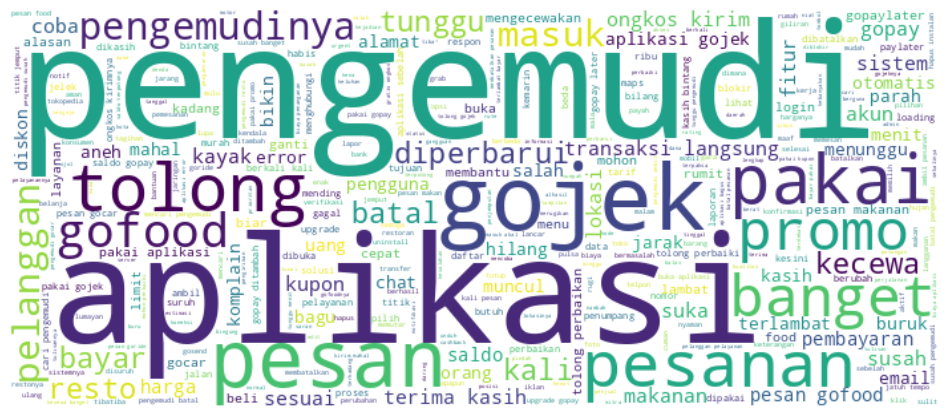

In [ ]:
# membuat visualisasi WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

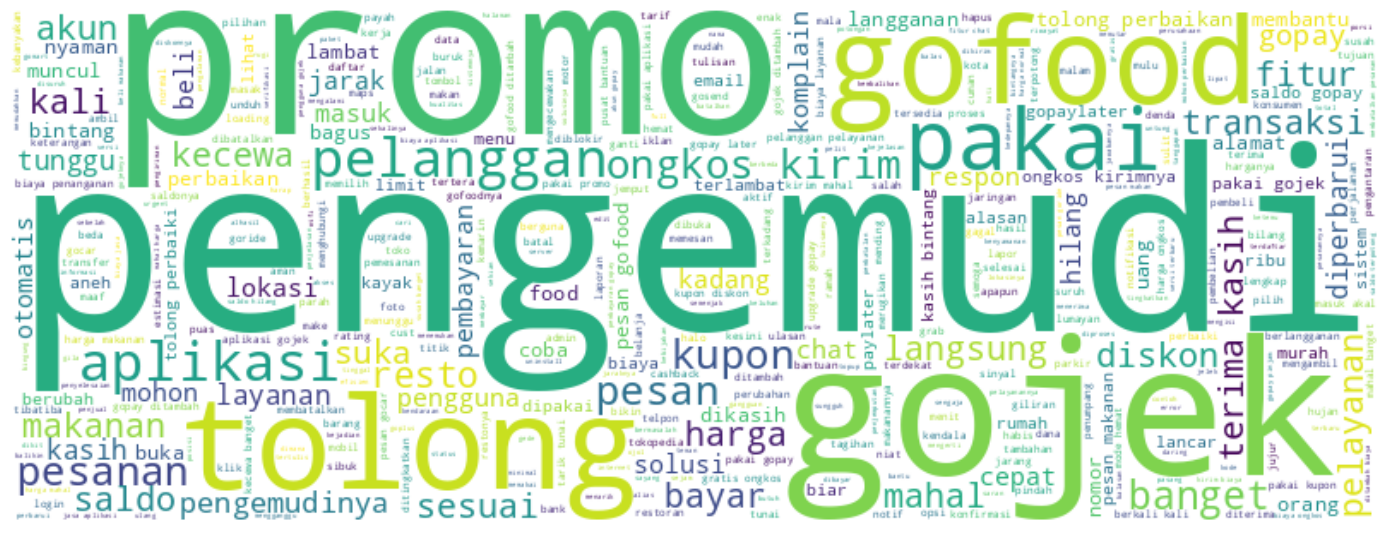

In [ ]:
sentiment_pos = ' '.join([review for review in clean_df['text_akhir'][clean_df['polarity'] == 'positive']])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

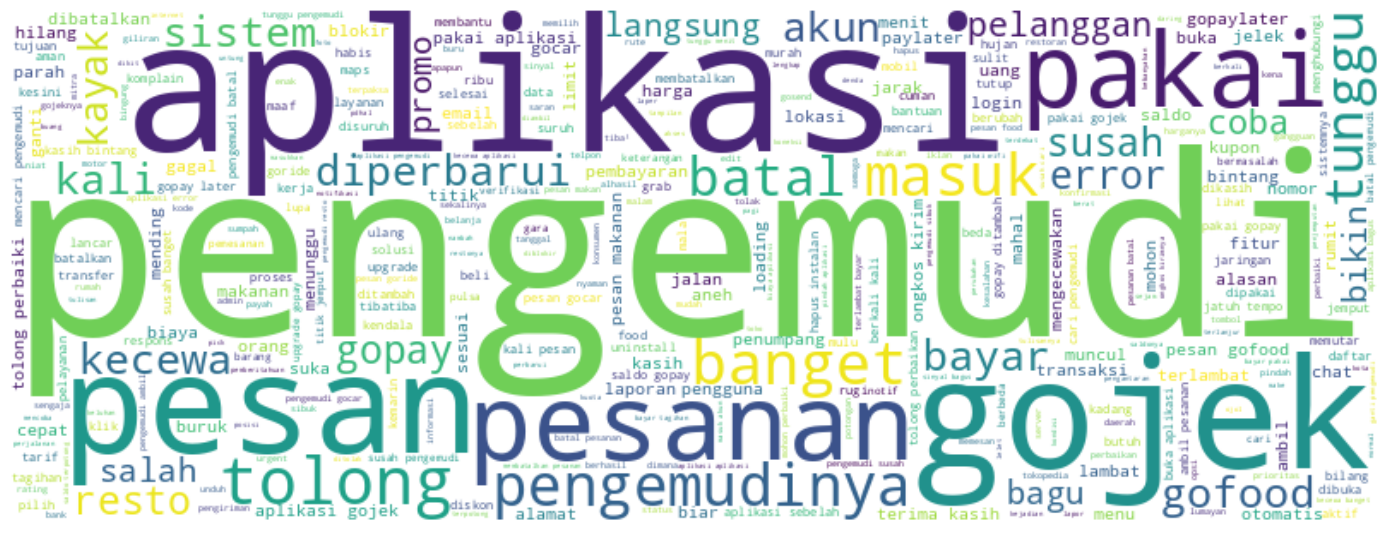

In [ ]:
sentiment_neg = ' '.join([review for review in clean_df['text_akhir'][clean_df['polarity'] == 'negative']])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_neg)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_neg, interpolation="bilinear")
plt.show()

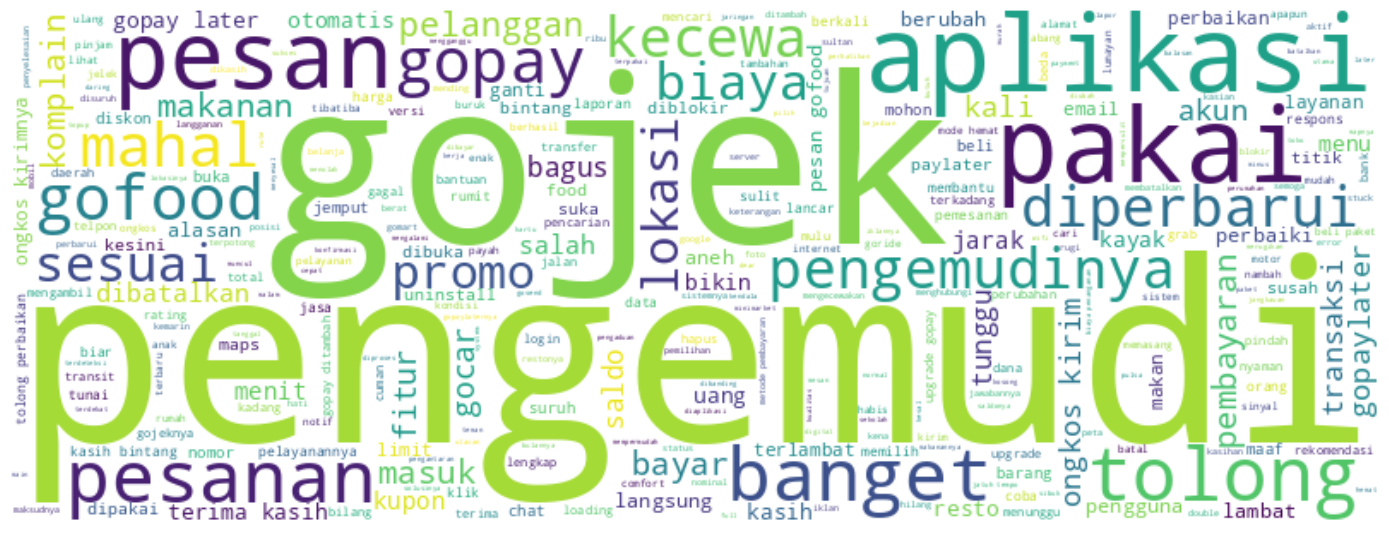

In [ ]:
sentiment_neg = ' '.join([review for review in clean_df['text_akhir'][clean_df['polarity'] == 'neutral']])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_neg)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_neg, interpolation="bilinear")
plt.show()

<ipython-input-27-8587d92b3964>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='polarity', data=clean_df, palette="pastel")


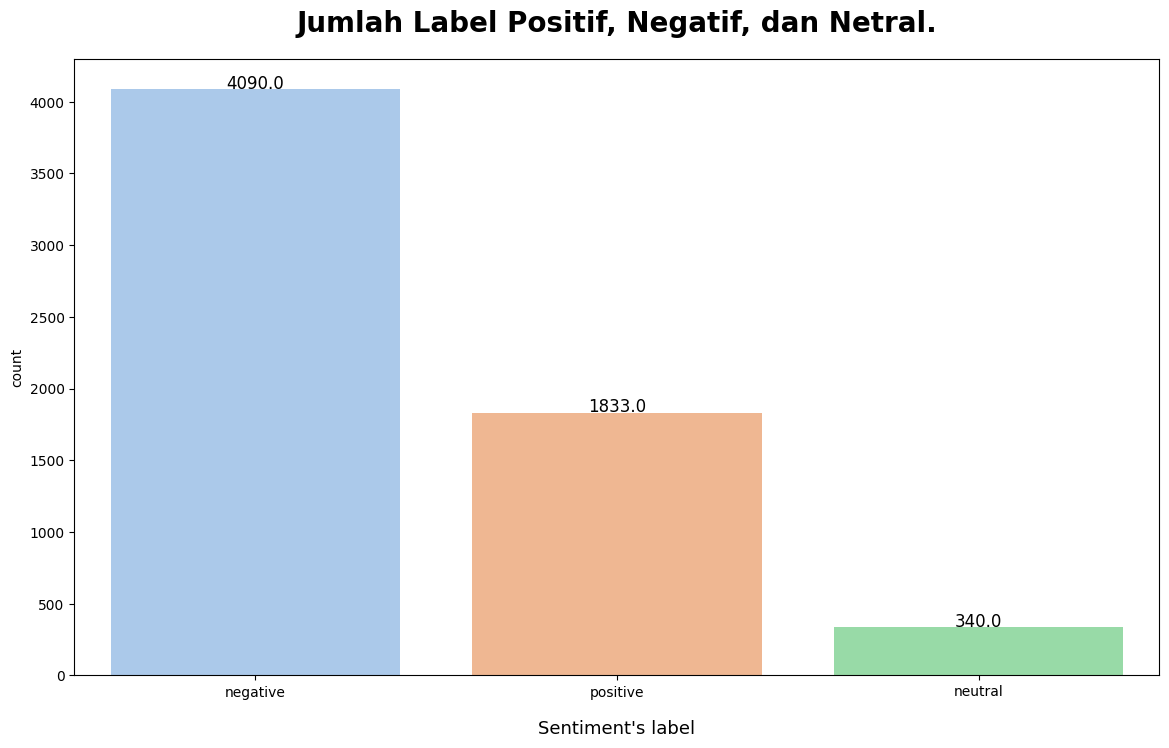

In [ ]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen positif dan negatif

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=clean_df, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif, Negatif, dan Netral.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

# Experiment 1
In experiment 1 using Indonesian language labeling, namely the language lexicon. Then using TF-IDF feature extraction and using variations of data separation, and the machine learning model used.

# RandomForest Classifier
## 6. Data Splitting and Feature Extraction with TF-IDF

---
    
| ⚡ Description: Data Splitting and Feature Extraction with TF-IDF ⚡ |
| :--------------------------- |
| In this section, the data will be divided into training data and test data, then apply TF-IDF. |

---

In [43]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['label']

In [30]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=700, min_df=50, max_df=0.6, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,admin,akal,akses,aktif,aktifkan,akun,akun gojek,akun gopay,akurat,alamat,...,upgrade,upgrade gopay,urgent,user,utama,verifikasi,versi,versi terbaru,wajar,wifi
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.688356,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14981,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14982,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14983,0.0,0.0,0.000000,0.0,0.0,0.192678,0.0,0.0,0.0,0.0,...,0.212944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14984,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Oversampling menggunakan RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_tfidf, y)

In [ ]:
print(f"Distribusi kelas setelah oversampling: {Counter(y_resampled)}")

Distribusi kelas setelah oversampling: Counter({0: 8976, 1: 8976, 2: 8976})


In [ ]:
# Bagi data menjadi data latih dan data uji
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=50)

In [ ]:
# Normalisasi Data
scaler = StandardScaler(with_mean=False)
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

## 7. Modelling

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we create a Random Forest model for text cclassification. |

---

In [ ]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

## 8. Training Model

---
    
| ⚡ Description: Training model ⚡ |
| :--------------------------- |
| In this section, we will carry out training data using the Random Forest model that has been created. |

---

In [ ]:
# Membuat dan melatih model RandomForestClassifier
clf.fit(X_train2_scaled.toarray(), y_train2)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_clf = clf.predict(X_train2_scaled.toarray())
y_pred_test_clf = clf.predict(X_test2_scaled.toarray())

## 9. Model Validation

---
    
| ⚡ Description: Model validation ⚡ |
| :--------------------------- |
| In this section, we validate the model on the validation dataset to measure its performance and prevent overfitting. |

---

In [ ]:
# Evaluasi akurasi model SVM
accuracy_train_clf = accuracy_score(y_pred_train_clf, y_train2)
accuracy_test_clf = accuracy_score(y_pred_test_clf, y_test2)

# Menampilkan akurasi
print('SVM - accuracy_train:', accuracy_train_clf)
print('SVM - accuracy_test:', accuracy_test_clf)

SVM - accuracy_train: 0.9963907323320527
SVM - accuracy_test: 0.9255637055148057


# SVM (Support Vector Machine)
## 6. Data Splitting and Feature Extraction with TF-IDF

---
    
| ⚡ Description: Data Splitting and Feature Extraction with TF-IDF ⚡ |
| :--------------------------- |
| In this section, the data will be divided into training data and test data, then apply TF-IDF. |

---

In [21]:
# Bagi data menjadi data latih dan data uji
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=50)

In [57]:
# Bagi data menjadi data latih dan data uji
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=50)

In [58]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=700, min_df=50, max_df=0.6, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(X_train1)
X_test_tfidf = tfidf.transform(X_test1)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,admin,akal,akses,aktif,aktifkan,akun,akun gojek,akurat,alamat,alasan,...,uninstall,untung,upgrade,upgrade gopay,urgent,user,utama,verifikasi,versi,wifi
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.15027,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.150887,0.0,0.00000,0.000000,0.00000,...,0.0,0.0,0.32881,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11983,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11984,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11985,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11986,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.27852,0.223792,0.00000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Normalisasi Data
scaler = StandardScaler(with_mean=False)
X_train1_scaled = scaler.fit_transform(X_tfidf)
X_test1_scaled = scaler.transform(X_test_tfidf)

## 7. Modelling

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we create a Support Vector Machines model for text cclassification. |

---

In [59]:
# Preprocessing and Vectorization
svm_model = SVC(kernel='rbf', C=10, gamma='scale')

## 8. Training Model

---
    
| ⚡ Description: Training model ⚡ |
| :--------------------------- |
| In this section, we will carry out training data using the Support Vector Machines model that has been created. |

---

In [49]:
# Fit model
svm_model.fit(X_train1_scaled.toarray(), y_train1)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm = svm_model.predict(X_train1_scaled.toarray())
y_pred_test_svm = svm_model.predict(X_test1_scaled.toarray())

In [60]:
# Fit model
svm_model.fit(X_tfidf, y_train1)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm = svm_model.predict(X_tfidf)
y_pred_test_svm = svm_model.predict(X_test_tfidf)

## 9. Model Validation

---
    
| ⚡ Description: Model validation ⚡ |
| :--------------------------- |
| In this section, we validate the model on the validation dataset to measure its performance and prevent overfitting. |

---

In [25]:
# Evaluasi akurasi model SVM
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train1)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test1)

# Menampilkan akurasi
print('SVM - accuracy_train:', accuracy_train_svm)
print('SVM - accuracy_test:', accuracy_test_svm)

SVM - accuracy_train: 0.9947544332002599
SVM - accuracy_test: 0.9465280356479763


In [61]:
# Evaluasi akurasi model SVM
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train1)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test1)

# Menampilkan akurasi
print('SVM - accuracy_train:', accuracy_train_svm)
print('SVM - accuracy_test:', accuracy_test_svm)

SVM - accuracy_train: 0.9962462462462462
SVM - accuracy_test: 0.8495663775850567


# Experiment 2
In experiment 1 using Indonesian language labeling, namely the language lexicon. Then using Bag of Words feature extraction and using variations of data separation, and the machine learning model used.

# Gradient Boosting Machines (GBM)
## 6. Data Splitting and Feature Extraction with Bag of Words

---
    
| ⚡ Description: Data Splitting and Feature Extraction with Bag of Words ⚡ |
| :--------------------------- |
| In this section, the data will be divided into training data and test data, then apply Bag of Words. |

---

In [ ]:
vectorizer = CountVectorizer(max_features=5000)
X_cv = vectorizer.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_CV_df = pd.DataFrame(X_cv.toarray(), columns=vectorizer.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_CV_df

,aaawwa,abaikan,abal,abang,abangnya,acak,acara,accept,accident,acnya,...,yanh,yasaya,yasudah,yaudah,yesel,youtube,zaman,zero,𝐠𝐨𝐩𝐚𝐲,𝐬𝐢𝐬𝐭𝐞𝐦
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Oversampling menggunakan RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled_cv, y_resampled_cv = ros.fit_resample(X_cv, y)

In [ ]:
print(f"Distribusi kelas setelah oversampling: {Counter(y_resampled_cv)}")

Distribusi kelas setelah oversampling: Counter({0: 4090, 1: 4090, 2: 4090})


In [ ]:
# Bagi data menjadi data latih dan data uji
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_resampled_cv, y_resampled_cv, test_size=0.25, random_state=50)

In [ ]:
# Normalisasi Data
scaler = StandardScaler(with_mean=False)
X_train_cv_scaled = scaler.fit_transform(X_train_cv)
X_test_cv_scaled = scaler.transform(X_test_cv)

## 7. Modelling

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we create a Gradient Boosting Machines (GBM) model for text cclassification. |

---

In [ ]:
# Inisialisasi model Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.5, random_state=128)

## 8. Training Model

---
    
| ⚡ Description: Training model ⚡ |
| :--------------------------- |
| In this section, we will carry out training data using the Gradient Boosting Machines (GBM) model that has been created. |

---

In [ ]:
with tf.device('/device:GPU:0'):
  # Latih model
  gbm_model.fit(X_train_cv_scaled, y_train_cv)
  # Prediksi sentimen pada data pelatihan dan data uji
  y_pred_train_gbm = gbm_model.predict(X_train_cv_scaled)
  y_pred_test_gbm = gbm_model.predict(X_test_cv_scaled)

## 9. Model Validation

---
    
| ⚡ Description: Model validation ⚡ |
| :--------------------------- |
| In this section, we validate the model on the validation dataset to measure its performance and prevent overfitting. |

---

In [ ]:
# Evaluasi akurasi model Naive Bayes
accuracy_train_gbm = accuracy_score(y_pred_train_gbm, y_train_cv)
accuracy_test_gbm = accuracy_score(y_pred_test_gbm, y_test_cv)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_gbm)
print('Naive Bayes - accuracy_test:', accuracy_test_gbm)

Naive Bayes - accuracy_train: 0.9963051510541187
Naive Bayes - accuracy_test: 0.9299217731421121


# Experiment 3
In experiment 1 using Indonesian language labeling, namely the language lexicon. Then using the Hashing Vectorizer feature extraction and using variations of data separation, and the machine learning model used.

# XGBoost
## 6. Data Splitting and Feature Extraction with Hashing Vectorizer

---
    
| ⚡ Description: Data Splitting and Feature Extraction with hashing ⚡ |
| :--------------------------- |
| In this section, the data will be divided into training data and test data, then apply hashing vectorizer. |

---

In [ ]:
vectorizer = HashingVectorizer(n_features=5000)
X_hash = vectorizer.transform(X)

In [ ]:
# Oversampling menggunakan RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled_hash, y_resampled_hash = ros.fit_resample(X_hash, y)

In [ ]:
print(f"Distribusi kelas setelah oversampling: {Counter(y_resampled_hash)}")

Distribusi kelas setelah oversampling: Counter({0: 4090, 1: 4090, 2: 4090})


In [ ]:
scaler = StandardScaler(with_mean=False)
X_scaled_hash = scaler.fit_transform(X_resampled_hash.toarray())

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train_hash, X_test_hash, y_train_hash, y_test_hash = train_test_split(X_scaled_hash, y_resampled_hash, test_size=0.3, random_state=42)

## 7. Modelling

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we create a Naive Bayes model for text cclassification. |

---

In [ ]:
# Definisikan model XGBoost
xgBoost = xgb.XGBClassifier(learning_rate=1, use_label_encoder=False, eval_metric='mlogloss')

## 8. Training Model

---
    
| ⚡ Description: Training model ⚡ |
| :--------------------------- |
| In this section, we will carry out training data using the Naive Bayes model that has been created. |

---

In [ ]:
with tf.device('/device:GPU:0'):
  # Melatih model XGBoost pada data pelatihan
  xgBoost.fit(X_train_hash, y_train_hash)
  # Prediksi sentimen pada data pelatihan dan data uji
  y_pred_train_xgb = xgBoost.predict(X_train_hash)
  y_pred_test_xgb = xgBoost.predict(X_test_hash)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:02:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## 9. Model Validation

---
    
| ⚡ Description: Model validation ⚡ |
| :--------------------------- |
| In this section, we validate the model on the validation dataset to measure its performance and prevent overfitting. |

---

In [ ]:
# Evaluasi akurasi model XGBoost
accuracy_train_xgb = accuracy_score(y_pred_train_xgb, y_train_hash)
accuracy_test_xgb = accuracy_score(y_pred_test_xgb, y_test_hash)

# Menampilkan akurasi
print('XGBoost - accuracy_train:', accuracy_train_xgb)
print('XGBoost - accuracy_test:', accuracy_test_xgb)

XGBoost - accuracy_train: 0.9987192921178252
XGBoost - accuracy_test: 0.9290953545232273


# 10. Inference

---
    
| ⚡ Description: Inference ⚡ |
| :--------------------------- |
| The inference cell in the model training notebook is the section used to make predictions using the trained model and draw conclusions. |

---

In [ ]:
# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Support Vector Machines', 'Gradient Boosting Machines', 'XGBoost'],
    'Accuracy Train': [accuracy_train_clf, accuracy_train_svm, accuracy_train_gbm, accuracy_train_xgb],
    'Accuracy Test': [accuracy_test_clf, accuracy_test_svm, accuracy_test_gbm, accuracy_test_xgb]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                        Model  Accuracy Test
0               Random Forest       0.925564
1     Support Vector Machines       0.949878
2  Gradient Boosting Machines       0.929922
3                     XGBoost       0.929095


In [ ]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)

                        Model  Accuracy Test
1     Support Vector Machines       0.949878
2  Gradient Boosting Machines       0.929922
3                     XGBoost       0.929095
0               Random Forest       0.925564


In [66]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])
X_kalimat_baru_scaled = scaler.fit_transform(X_kalimat_baru)

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = svm_model.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 1:
    print("Sentimen kalimat baru adalah POSITIF.")
elif prediksi_sentimen[0] == 0:
  print("Sentimen kalimat baru adalah NEGATIVE.")
else:
    print("Sentimen kalimat baru adalah NEUTRAL.")

Masukkan kalimat baru: aplikasi ini sangat bermanfaat, terima kasih banyak
Sentimen kalimat baru adalah POSITIF.


# Export requirements.txt

In [ ]:
pip freeze > requirements.txt